<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [26]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-17 15:19:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  53.7MB/s    in 3.7s    

2025-07-17 15:19:47 (54.5 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [27]:
!pip install pandas

In [28]:
!pip install matplotlib

In [29]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [30]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [31]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [32]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [33]:
!pip install seaborn

import seaborn as sns

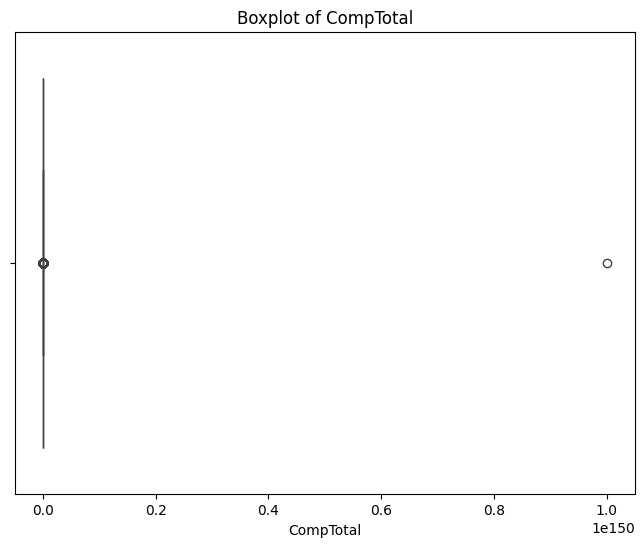

In [34]:
# your code goes here
QUERY = """
SELECT CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.head()
# Plot the boxplot with KDE
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CompTotal'])

plt.title('Boxplot of CompTotal')
plt.xlabel('CompTotal')
plt.show()



**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


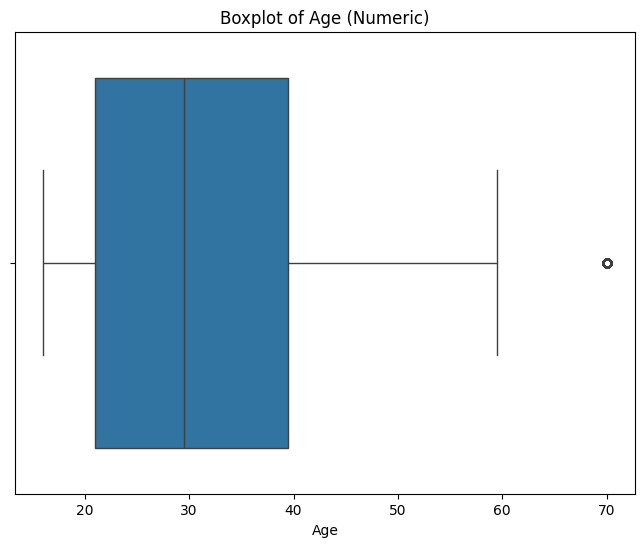

In [35]:
# your code goes here
QUERY = """
SELECT Age
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
# Apply the mapping
df['Age_numeric'] = df['Age'].map(age_mapping)
# visualize using boxplot
df = df.dropna(subset=['Age_numeric'])
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age_numeric'])

plt.title('Boxplot of Age (Numeric)')
plt.xlabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


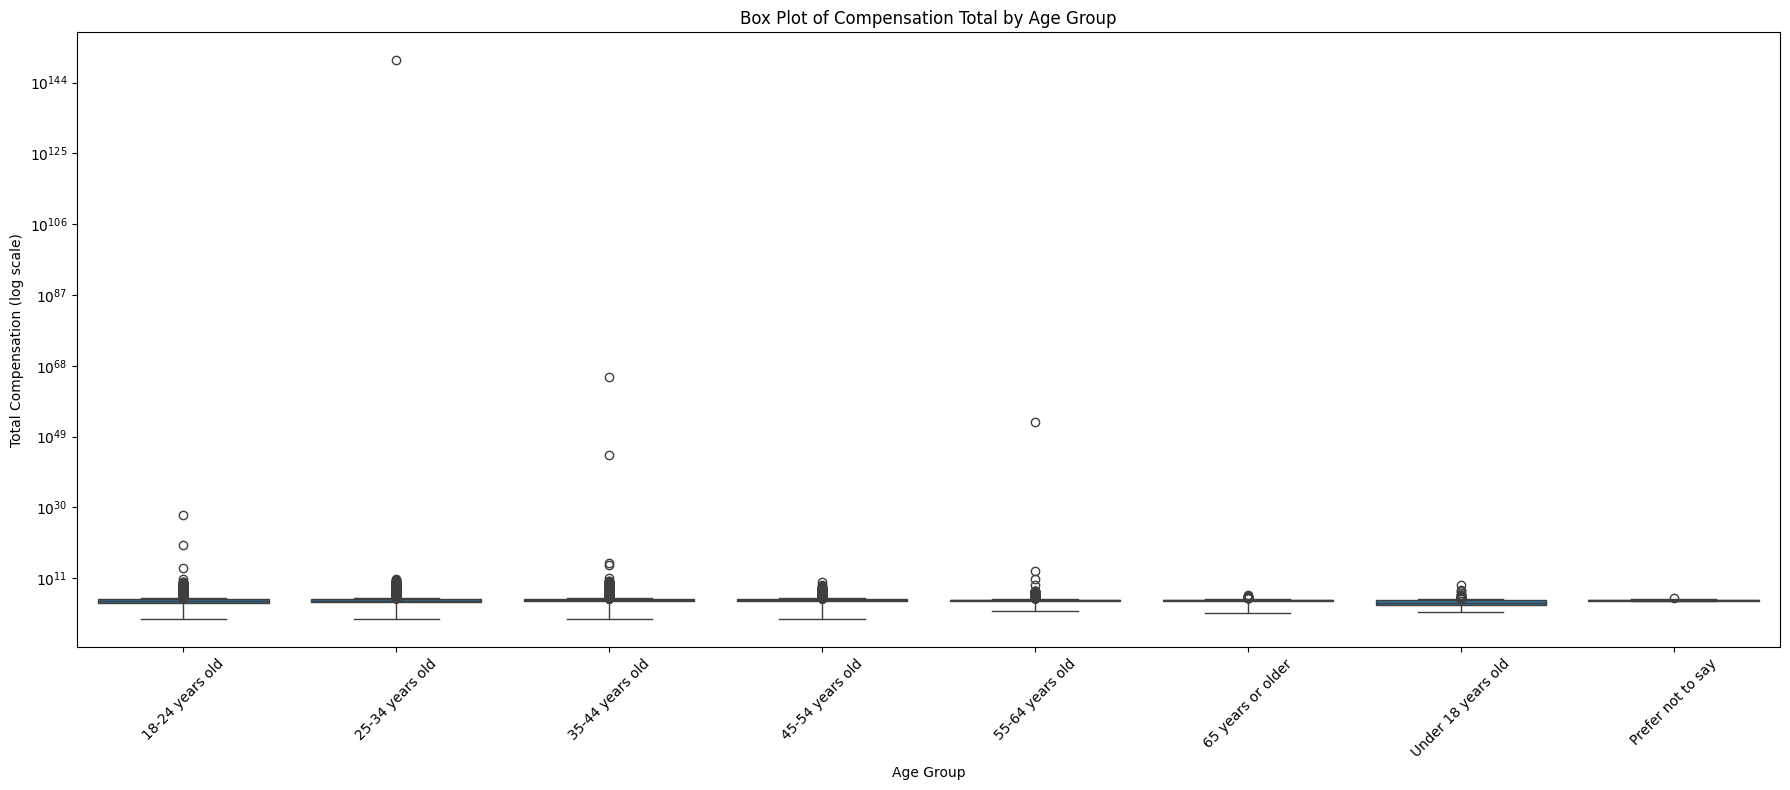

In [36]:
# your code goes here
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

# Drop rows where Age or CompTotal is missing
df = df.dropna(subset=['Age', 'CompTotal'])

# Remove entries where CompTotal is 0 or negative (optional)
df = df[df['CompTotal'] > 0]

# plot the Box plot
plt.figure(figsize=(18, 8))
sns.boxplot(x='Age', y='CompTotal', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yscale('log')        # Optional: log scale to handle large variation in salaries
plt.title('Box Plot of Compensation Total by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (log scale)')
plt.tight_layout()
plt.show()



**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


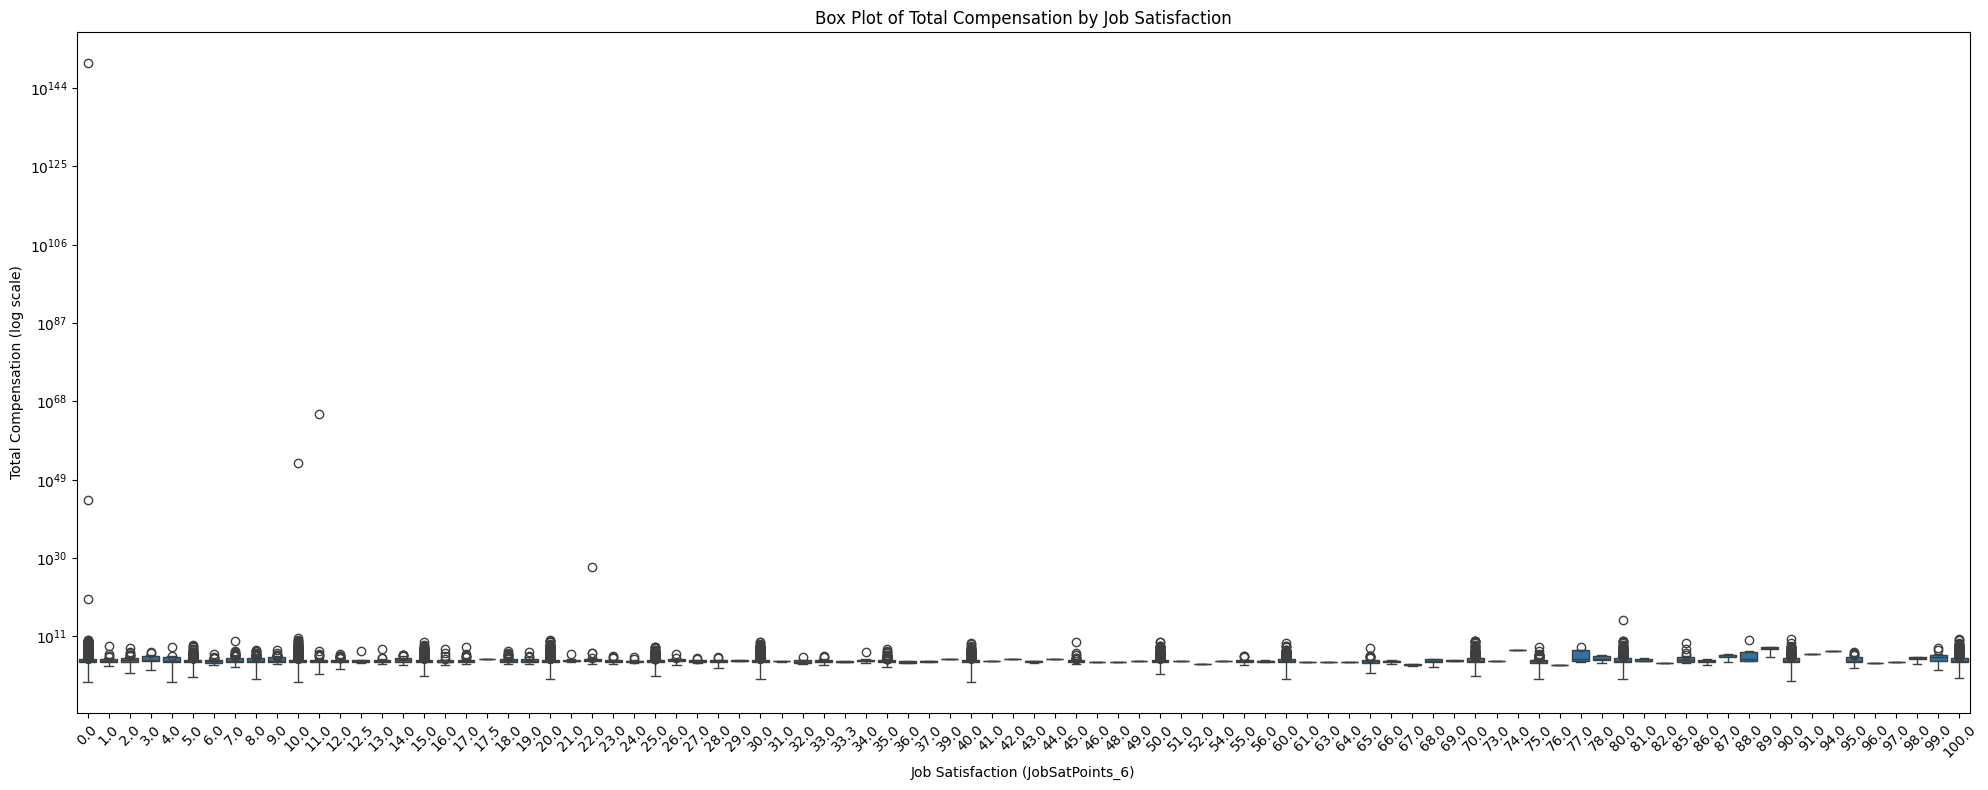

In [37]:
# your code goes here
QUERY = """
SELECT JobSatPoints_6, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

# Drop missing values
df = df.dropna(subset=['JobSatPoints_6', 'CompTotal'])

# Filter out zero or negative compensation values (optional but common)
df = df[df['CompTotal'] > 0]

# plot the boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df)
plt.xticks(rotation=45)
plt.yscale('log')  # log scale to handle large outliers

plt.title('Box Plot of Total Compensation by Job Satisfaction')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Total Compensation (log scale)')
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


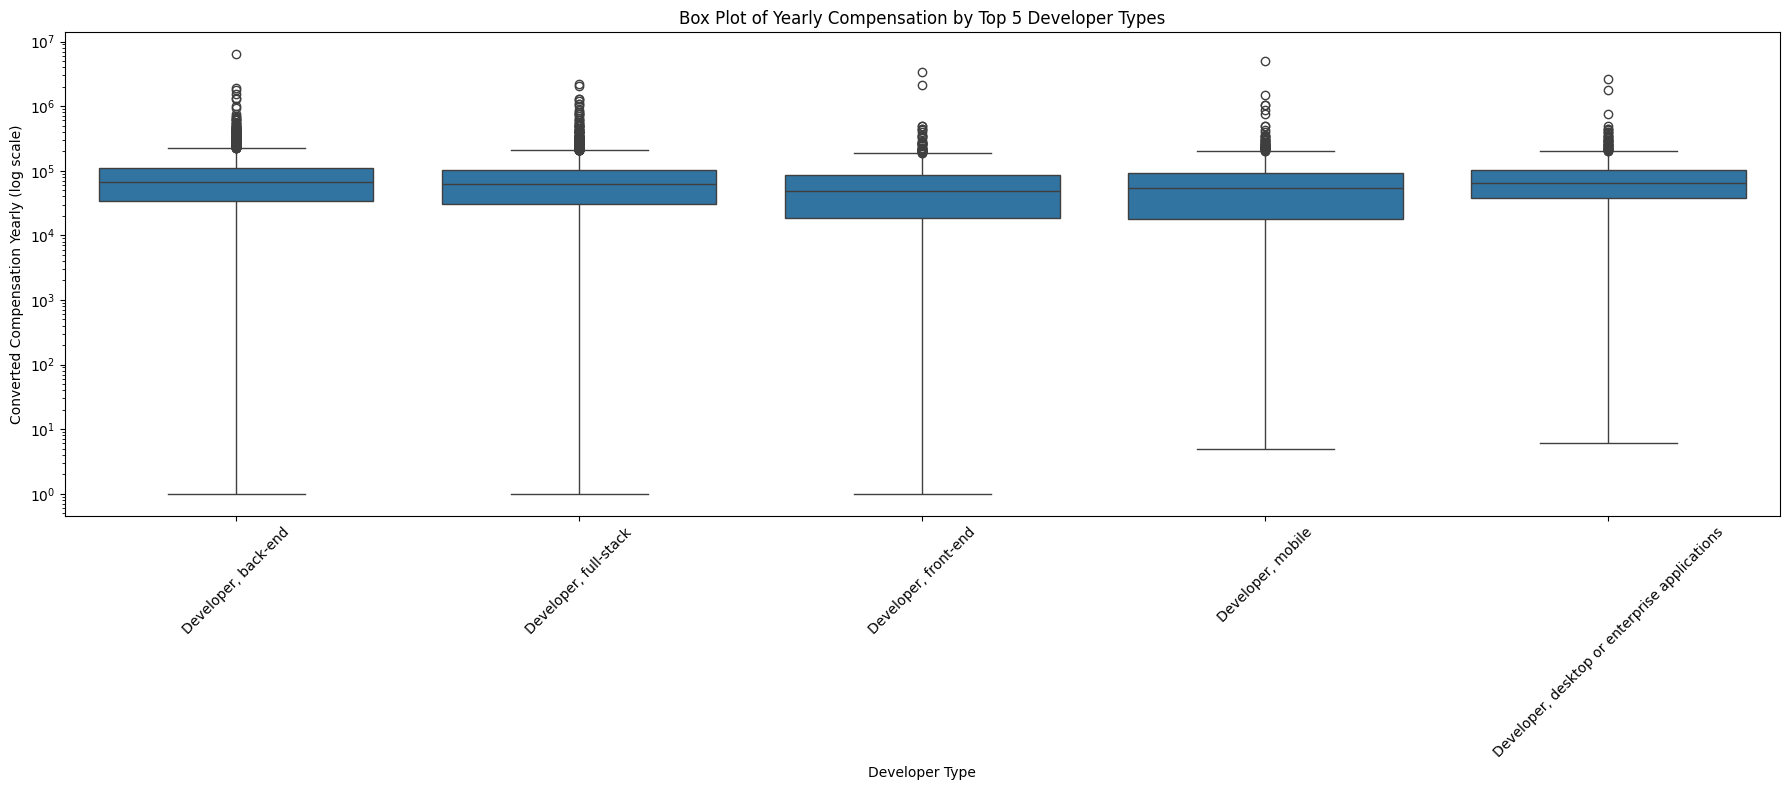

In [38]:
# your code goes here
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

# Drop missing values
df = df.dropna(subset=['DevType', 'ConvertedCompYearly'])

# Filter out non-positive salaries
df = df[df['ConvertedCompYearly'] > 0]

# Split DevType entries by semicolon and explode into separate rows
df['DevType'] = df['DevType'].str.split(';')
df = df.explode('DevType')

# Remove leading/trailing spaces
df['DevType'] = df['DevType'].str.strip()

# Get the top 5 most common developers
top_5_devtypes = df['DevType'].value_counts().nlargest(5).index
df_top5 = df[df['DevType'].isin(top_5_devtypes)]

# Plot the box plot
plt.figure(figsize=(18, 8))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top5)
plt.yscale('log')  # Optional: log scale for clearer view
plt.title('Box Plot of Yearly Compensation by Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation Yearly (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


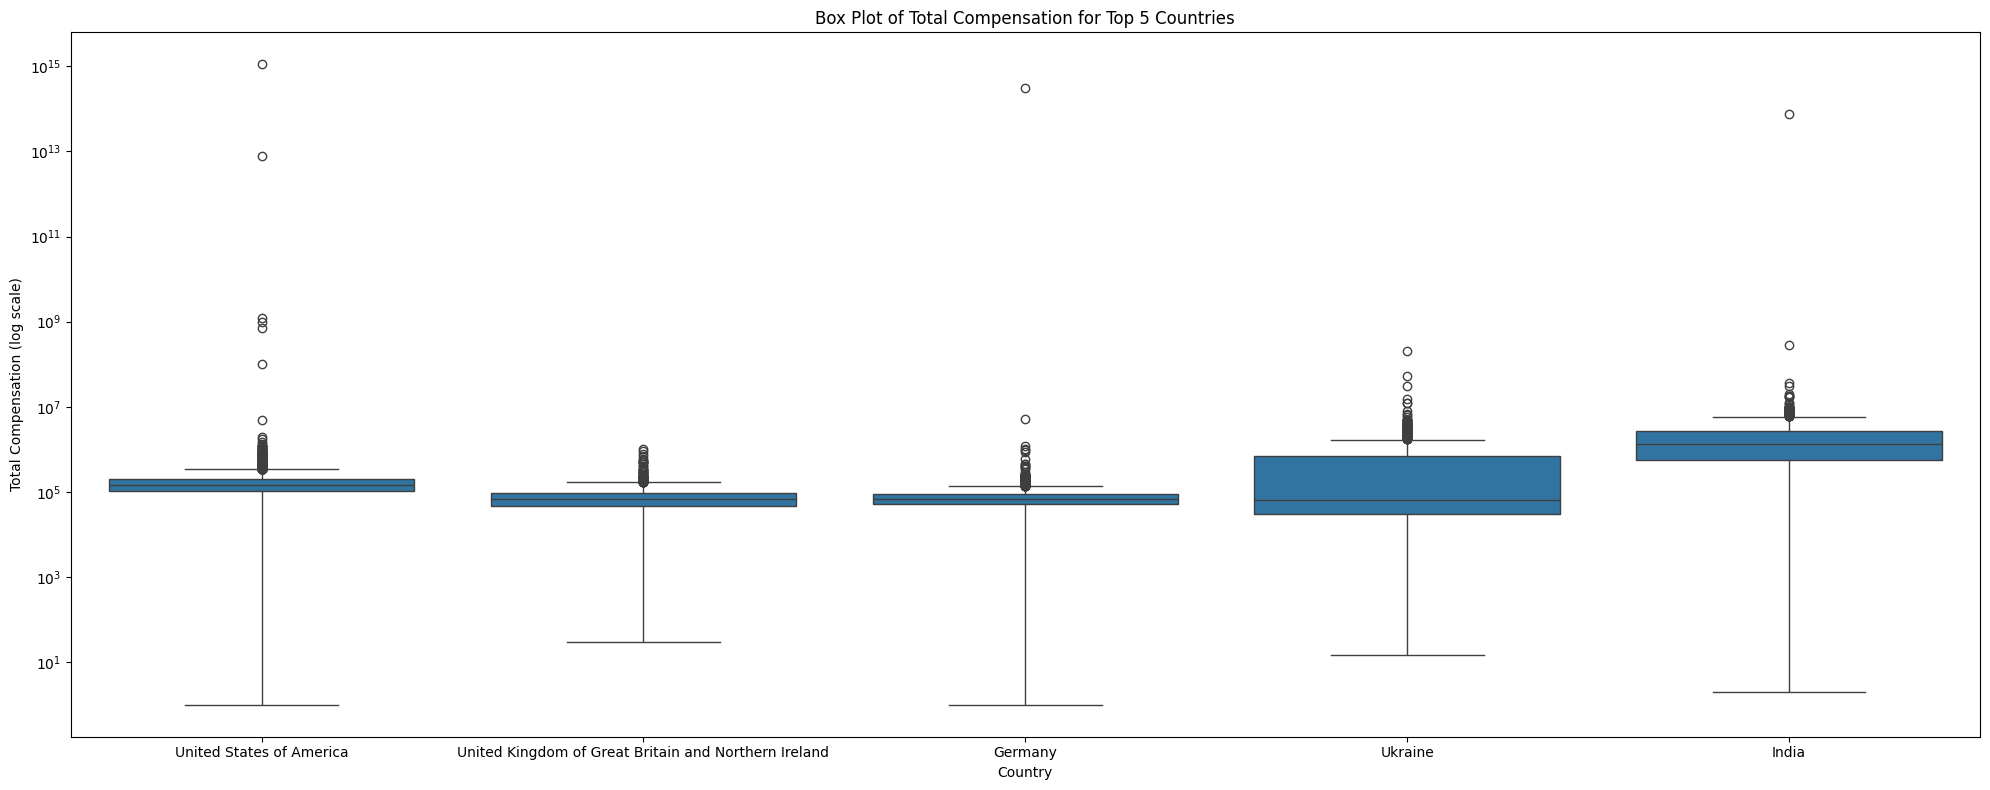

In [39]:
# your code goes here
QUERY = """
SELECT Country, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

# Drop rows with missing values
df = df.dropna(subset=['Country', 'CompTotal'])

# Keep only positive compensation values
df = df[df['CompTotal'] > 0]

# Get top 5 countries by number of respondents
top_countries = df['Country'].value_counts().nlargest(5).index

# Filter the dataset for only those countries
df_top5 = df[df['Country'].isin(top_countries)]

# Plot the Boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(x='Country', y='CompTotal', data=df_top5)
plt.yscale('log')  # Use log scale to handle wide salary range

plt.title('Box Plot of Total Compensation for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation (log scale)')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_300/2488508509.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


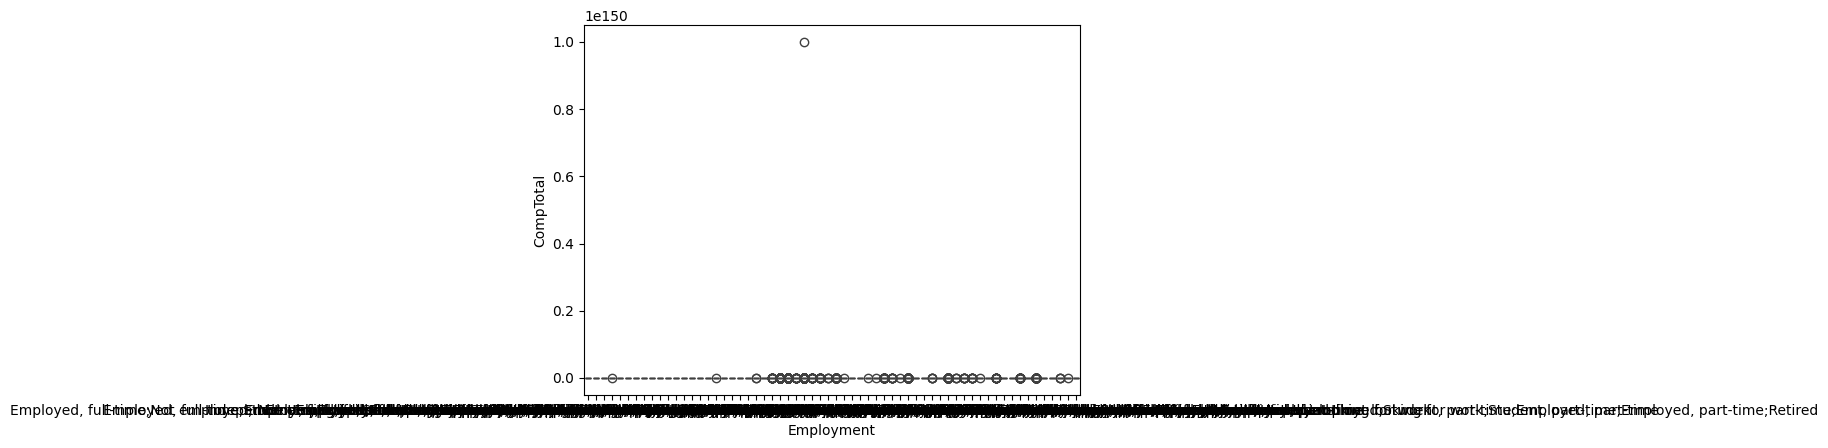

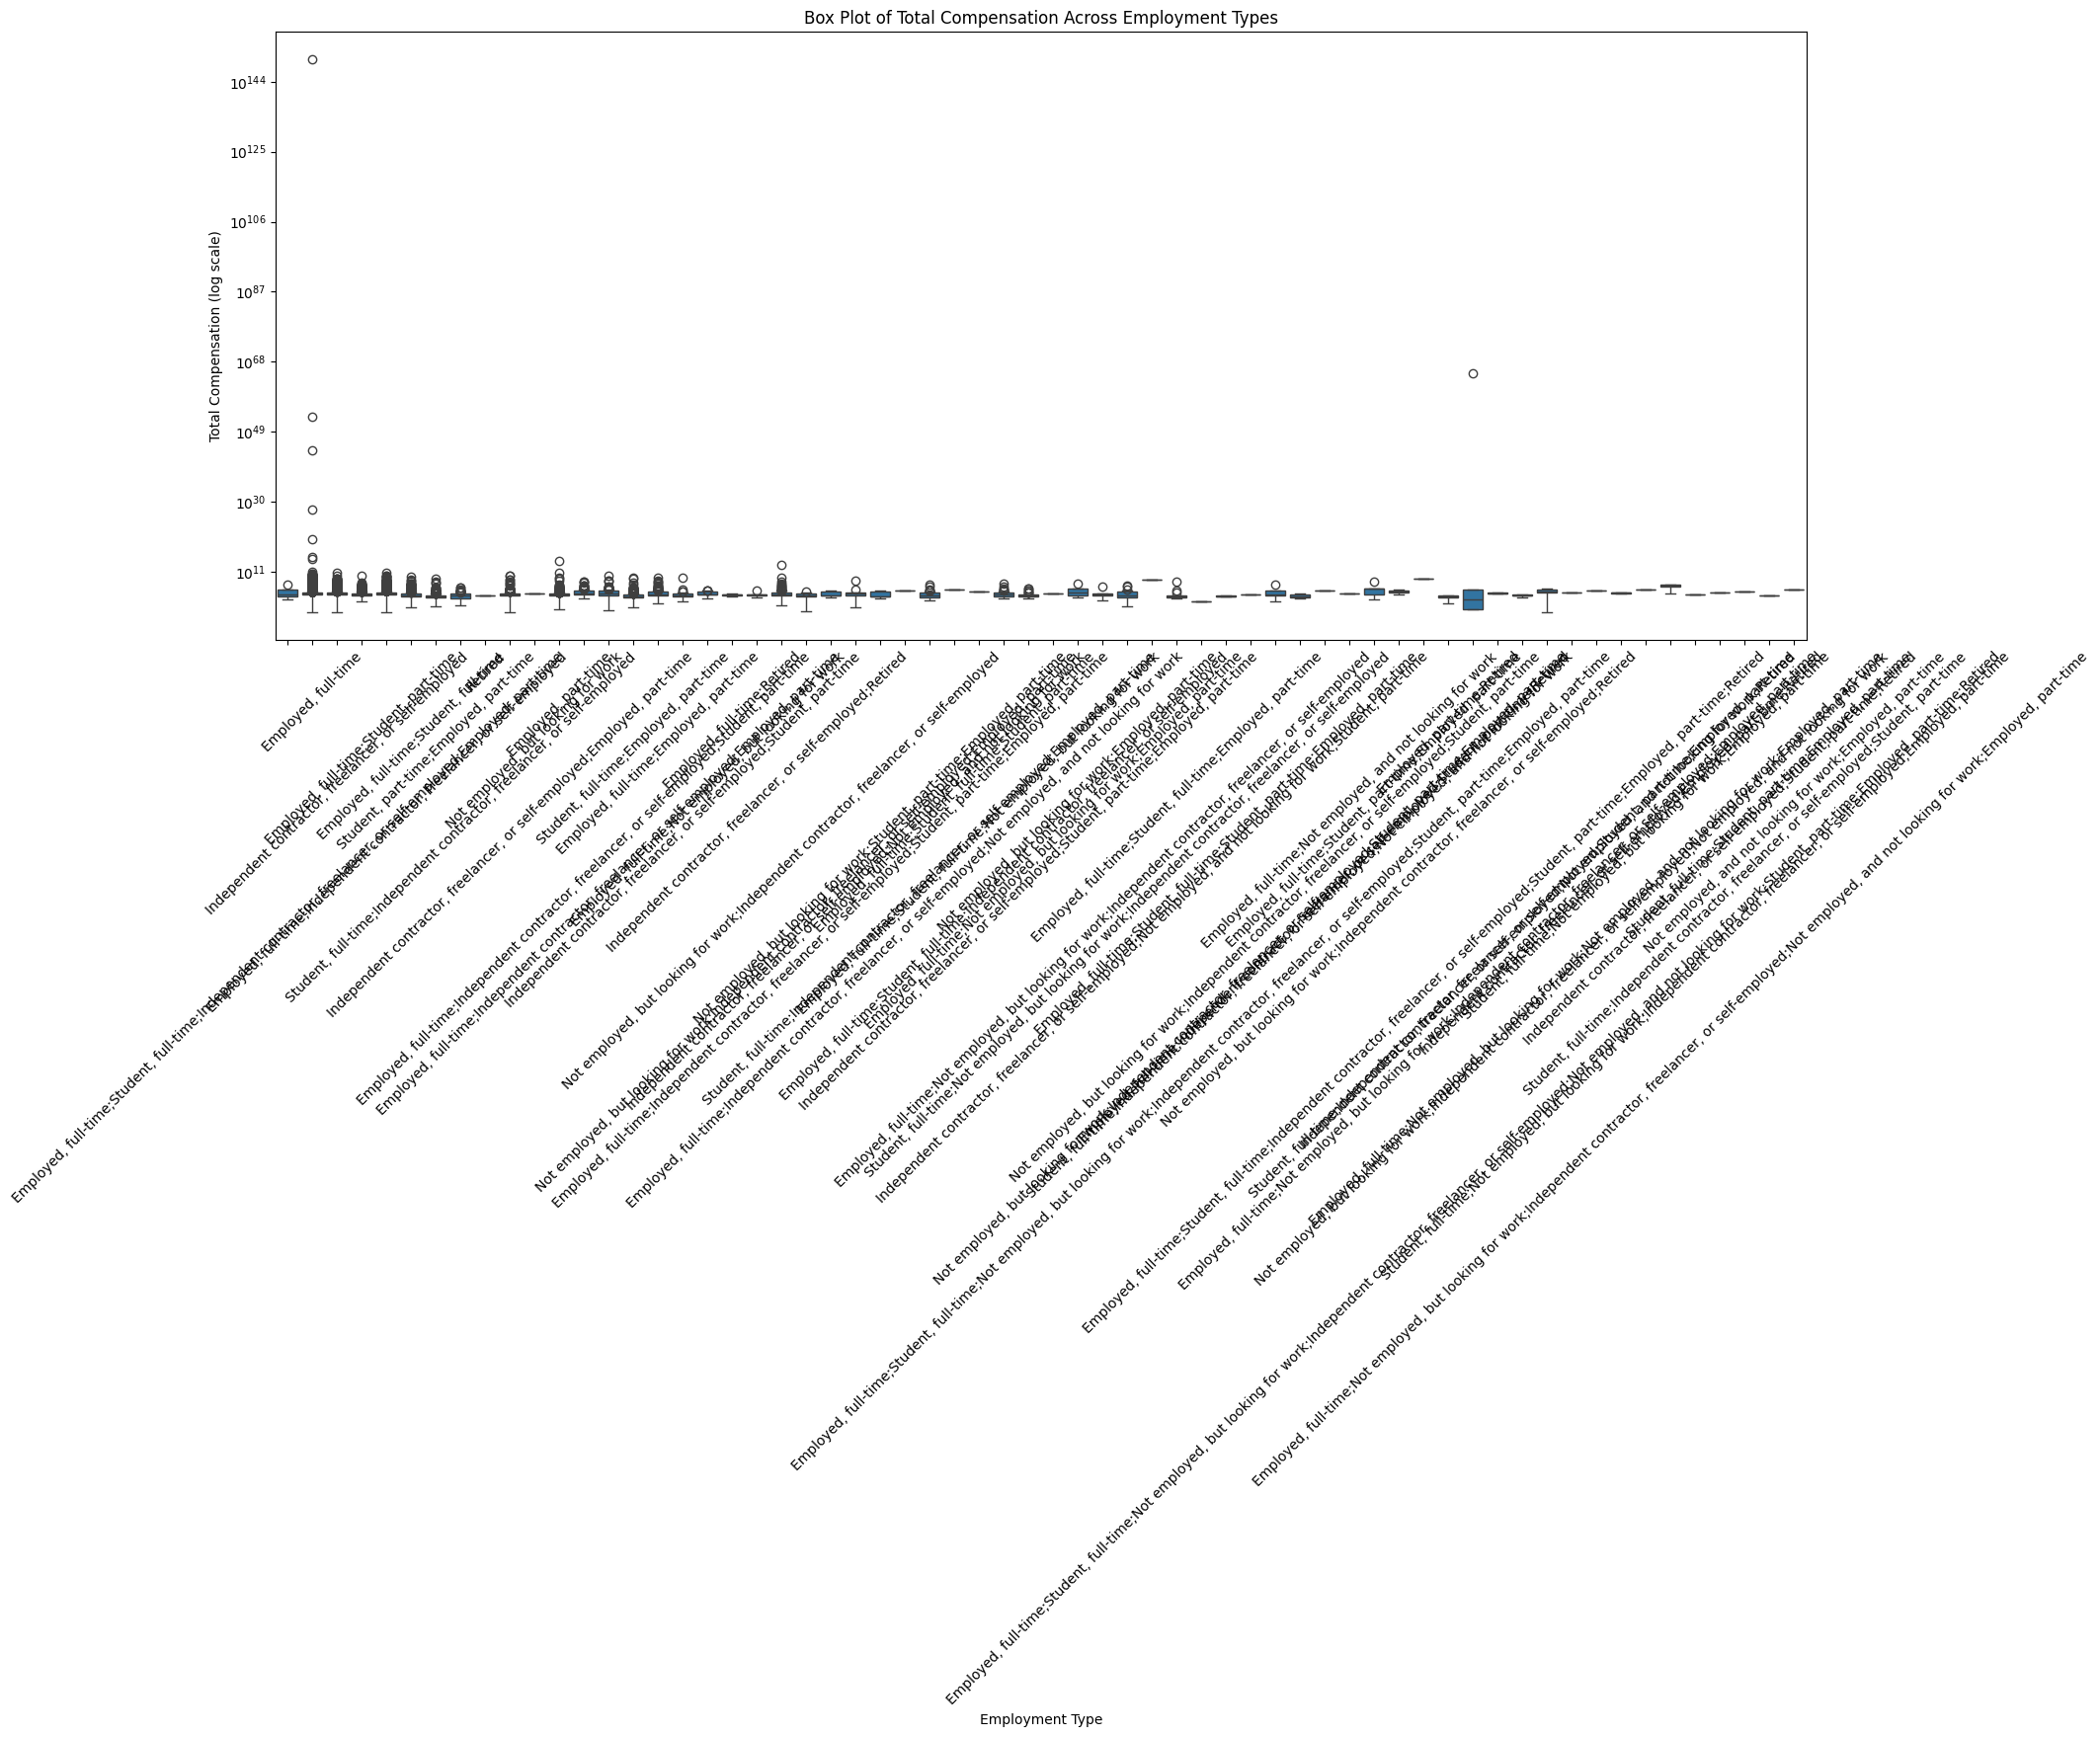

In [40]:
# your code goes here
QUERY = """
SELECT Employment, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

# Drop rows with missing values
df = df.dropna(subset=['Employment', 'CompTotal'])

# Filter out zero or negative compensation values (optional)
df = df[df['CompTotal'] > 0]

order = df.groupby('Employment')['CompTotal'].median().sort_values(ascending=False).index
sns.boxplot(x='Employment', y='CompTotal', data=df, order=order)

plt.figure(figsize=(20, 8))
sns.boxplot(x='Employment', y='CompTotal', data=df)
plt.xticks(rotation=45)
plt.yscale('log')  # Use log scale to better visualize wide salary range

plt.title('Box Plot of Total Compensation Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (log scale)')
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


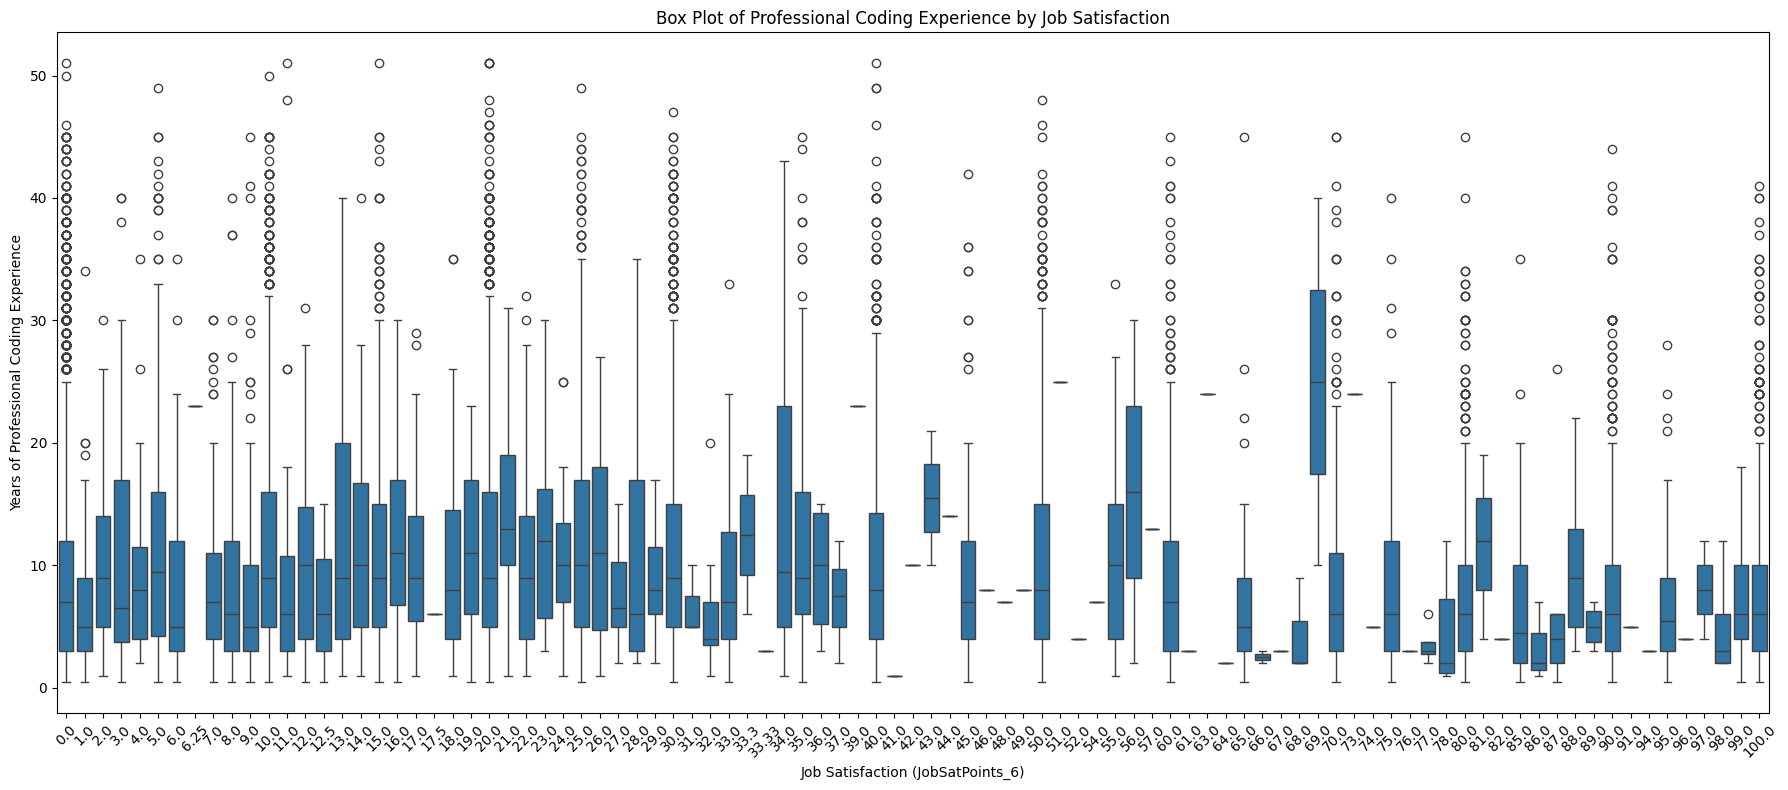

In [41]:
# your code goes here
QUERY = """
SELECT JobSatPoints_6, YearsCodePro
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

# Define mapping from string to numeric values
def convert_years(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    try:
        return float(val)
    except:
        return None

# Apply conversion
df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)

# Drop rows with missing values
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

plt.figure(figsize=(18, 8))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df)

plt.xticks(rotation=45)
plt.title('Box Plot of Professional Coding Experience by Job Satisfaction')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding Experience')
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [42]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
